# Classifier for Camels vs Horses
## about 100 in each class
### Nov 5, 2018

In [19]:
import fastai
fastai.show_install(0)



```text
=== Software === 
python version  : 3.6.5
fastai version  : 1.0.19
torch version   : 1.0.0.dev20181022
nvidia driver   : 396.44
torch cuda ver  : 9.2.148
torch cuda is   : available
torch cudnn ver : 7104
torch cudnn is  : enabled

=== Hardware === 
nvidia gpus     : 1
torch available : 1
  - gpu0        : 7611MB | Tesla P4

=== Environment === 
platform        : Linux-4.9.0-8-amd64-x86_64-with-debian-9.5
distro          : #1 SMP Debian 4.9.110-3+deb9u6 (2018-10-08)
conda env       : Unknown
python          : /opt/anaconda3/bin/python
sys.path        : 
/opt/anaconda3/lib/python36.zip
/opt/anaconda3/lib/python3.6
/opt/anaconda3/lib/python3.6/lib-dynload
/opt/anaconda3/lib/python3.6/site-packages
/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions
/home/jupyter/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be ins

In [20]:
!pwd

/home/jupyter/projects/dl_fastai


# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button. Then continue scrolling until you cannot scroll anymore. The maximum number of images Google Images shows is 700.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

In [21]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [22]:
from fastai import *
from fastai.vision import *

In [23]:
import glob
from io import BytesIO
import numpy as np

In [24]:
my_path = "/home/jupyter/tutorials/"
path = Path(my_path+'data/mammals')

---

### Setting up image folders
Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [25]:
num_images=100

In [26]:
folder = 'camels'
file = 'urls_camels.txt'

In [27]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [28]:
folder = 'horses'
file = 'urls_horses.txt'

In [29]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

Finally, upload your urls file. You just need to press Upload in your working directory and select your file, then click 'upload' on the right.

![](images/download_images/upload.png)

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images than can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

In [30]:
!head {my_path}data/mammals/urls_horses.txt

https://upload.wikimedia.org/wikipedia/commons/d/de/Nokota_Horses_cropped.jpg
https://equusmagazine.com/.image/t_share/MTQ1Mjc2NDE4Mzk1MjE5MzUy/feral-horse-and-foal-walk-along-the-beach-on-vieques-island-off-puerto-rico.jpg
https://i.ytimg.com/vi/_Yz0VL0GsNM/hqdefault.jpg
https://media.treehugger.com/assets/images/2018/02/three-horses.jpg.860x0_q70_crop-scale.jpg
https://www.equinenow.com/content/american-quarter-horse.jpg
https://www.sciencenews.org/sites/default/files/2018/02/main/articles/022118_EE_horses_feat.jpg
https://thehorse.com/wp-content/uploads/2017/09/paint-horse-running-in-field.jpg
https://www.aspca.org/sites/default/files/blog_072117_house-senate-vote-horse-slaughter_main_1.jpg
https://i.redd.it/a6me53rp6ha01.jpg
https://i.ytimg.com/vi/y1U1Eqfdg7w/maxresdefault.jpg


In [31]:
folder = 'camels'
file = 'urls_camels.txt'

path = Path(my_path+'data/mammals')

dest = path/folder

download_images(path/file, dest, max_pics=num_images)

Error https://www.thenational.ae/image/policy:1.695004:1515936024/image/jpeg.jpg?f=16x9&w=1200&$p$f$w=dfa40e8 'content-length'
Error 80/1920698/image.jpg Invalid URL '80/1920698/image.jpg': No schema supplied. Perhaps you meant http://80/1920698/image.jpg?
Error https://www.giladorigami.com/P_Camel_Montroll.JPG 'content-length'


In [32]:
folder = 'horses'
file = 'urls_horses.txt'
#file = 'horses.csv'

path = Path(my_path+'data/mammals')

dest = path/folder

download_images(path/file, dest, max_pics=num_images)

Error http://www.horseradionetwork.com/wp-content/uploads/2018/01/hcr-54.jpg 'content-length'
Error http://www.earthtimes.org/newsimage/wild-horses-america_1713.jpg 'content-length'
Error https://manentailequine.com/files/2016/06/mobile-horse-2.jpg 'content-length'
Error https://animalscience.unl.edu/Extension/Horse/Horsebanner2.jpg 'content-length'


## Check how many images in each class

In [33]:
!ls /home/jupyter/tutorials/data/mammals/camels | wc -l

97


In [34]:
!ls /home/jupyter/tutorials/data/mammals/horses | wc -l

96


## Verify images

Good! Let's take a look at some of our pictures then.

In [35]:
classes = ['camels','horses']

In [36]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

camels


cannot identify image file '/home/jupyter/tutorials/data/mammals/camels/00000036.jpg'
cannot identify image file '/home/jupyter/tutorials/data/mammals/camels/00000037.jpg'
cannot identify image file '/home/jupyter/tutorials/data/mammals/camels/00000072.jpg'
cannot identify image file '/home/jupyter/tutorials/data/mammals/camels/00000095.jpg'
cannot identify image file '/home/jupyter/tutorials/data/mammals/camels/00000085.jpg'
cannot identify image file '/home/jupyter/tutorials/data/mammals/camels/00000026.jpg'
horses


cannot identify image file '/home/jupyter/tutorials/data/mammals/horses/00000035.jpg'
cannot identify image file '/home/jupyter/tutorials/data/mammals/horses/00000085.jpg'
cannot identify image file '/home/jupyter/tutorials/data/mammals/horses/00000032.jpg'
cannot identify image file '/home/jupyter/tutorials/data/mammals/horses/00000088.jpg'
cannot identify image file '/home/jupyter/tutorials/data/mammals/horses/00000087.jpg'


In [37]:
!ls /home/jupyter/tutorials/data/mammals/camels | wc -l

91


In [38]:
!ls /home/jupyter/tutorials/data/mammals/horses | wc -l

91


## View data

In [ ]:
??ImageDataBunch

In [20]:
np.random.seed(42)
bs=32
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, \
                                  num_workers=4, bs=bs)

In [21]:
(path).ls()

[PosixPath('/home/jupyter/tutorials/data/mammals/urls_camels.txt'),
 PosixPath('/home/jupyter/tutorials/data/mammals/camels'),
 PosixPath('/home/jupyter/tutorials/data/mammals/urls_horses.txt'),
 PosixPath('/home/jupyter/tutorials/data/mammals/models'),
 PosixPath('/home/jupyter/tutorials/data/mammals/horses')]

In [22]:
#(path/'models').ls()

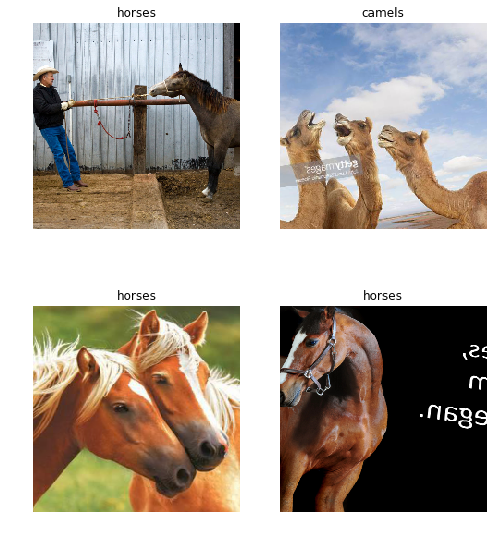

In [23]:
data.show_batch(rows=2, figsize=(7,8))

In [24]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)  

(['camels', 'horses'], 2, 137, 44)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories.

We will specify how many epochs (full pass through our dataset) for `learn.fit_one_cycle()`

In [25]:
learn = learner.create_cnn(data, models.resnet34, metrics=error_rate)

In [26]:
learn.fit_one_cycle(6)

Total time: 00:33
epoch  train_loss  valid_loss  error_rate
1      0.787946    0.419590    0.227273    (00:06)
2      0.520491    0.241012    0.136364    (00:05)
3      0.364704    0.161815    0.113636    (00:05)
4      0.273474    0.146765    0.045455    (00:05)
5      0.240409    0.114061    0.068182    (00:05)
6      0.192891    0.099773    0.068182    (00:05)



In [27]:
learn.unfreeze()

In [28]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


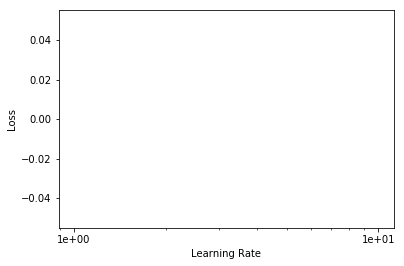

In [29]:
learn.recorder.plot()

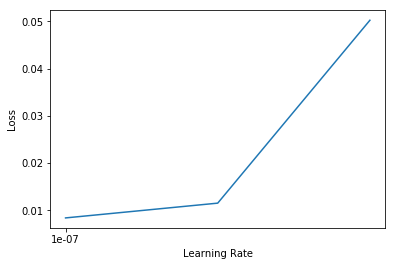

In [30]:
# if plot is blank
learn.recorder.plot(skip_start=0, skip_end=0)

In [31]:
learn.save('resnet34-stage-1')

In [32]:
learn.fit_one_cycle(4, max_lr=slice(3e-8,1e-6))

Total time: 00:22
epoch  train_loss  valid_loss  error_rate
1      0.030314    0.086658    0.068182    (00:05)
2      0.035033    0.079265    0.045455    (00:05)
3      0.034353    0.070712    0.045455    (00:05)
4      0.042161    0.073888    0.045455    (00:06)



In [33]:
learn.save('resnet34-stage-2')

## Interpretation

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

What the numbers represent:  
prediction | actual | loss | probability it was predicted

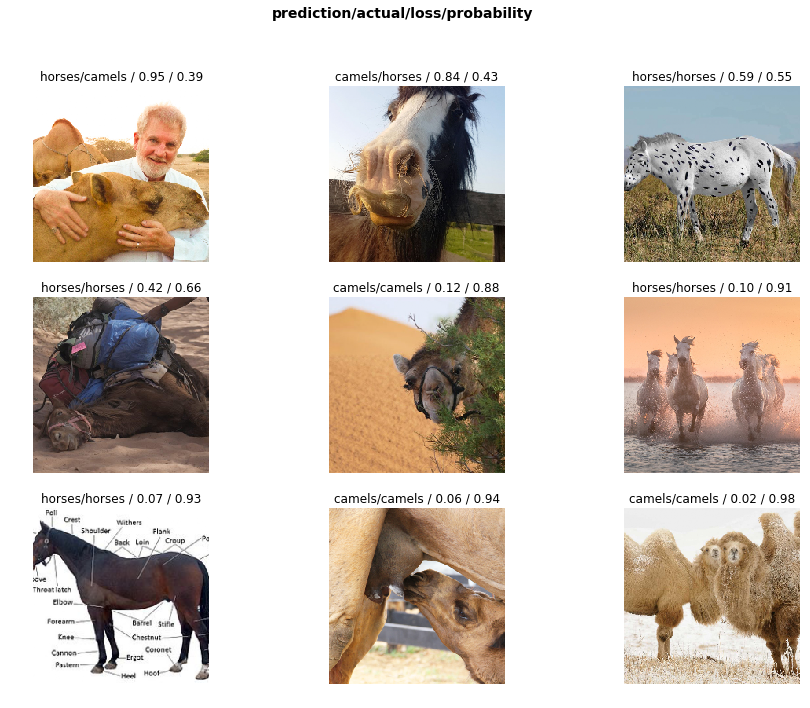

In [35]:
interp.plot_top_losses(9, figsize=(15,11))

In [36]:
doc(interp.plot_top_losses)

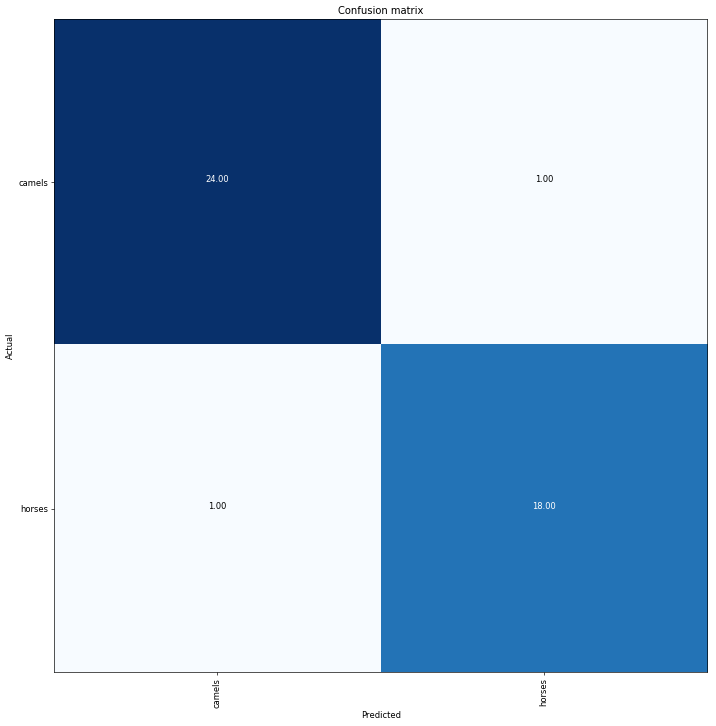

In [37]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [38]:
interp.most_confused(min_val=2)

[]

In [39]:
interp.most_confused(min_val=0)


[('camels', 'horses', 1), ('horses', 'camels', 1)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [40]:
learn.unfreeze()

In [41]:
learn.fit_one_cycle(1)

Total time: 00:06
epoch  train_loss  valid_loss  error_rate
1      0.105935    0.900570    0.159091    (00:06)



In [42]:
learn.load('resnet34-stage-2')

In [43]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


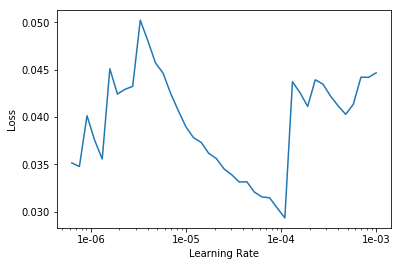

In [44]:
learn.recorder.plot()

In [45]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

Total time: 00:23
epoch  train_loss  valid_loss  error_rate
1      0.038674    0.076759    0.045455    (00:06)
2      0.044382    0.067871    0.045455    (00:05)
3      0.038194    0.063604    0.045455    (00:05)
4      0.085548    0.055561    0.022727    (00:06)



That's a pretty accurate model!

In [46]:
interp = ClassificationInterpretation.from_learner(learn)

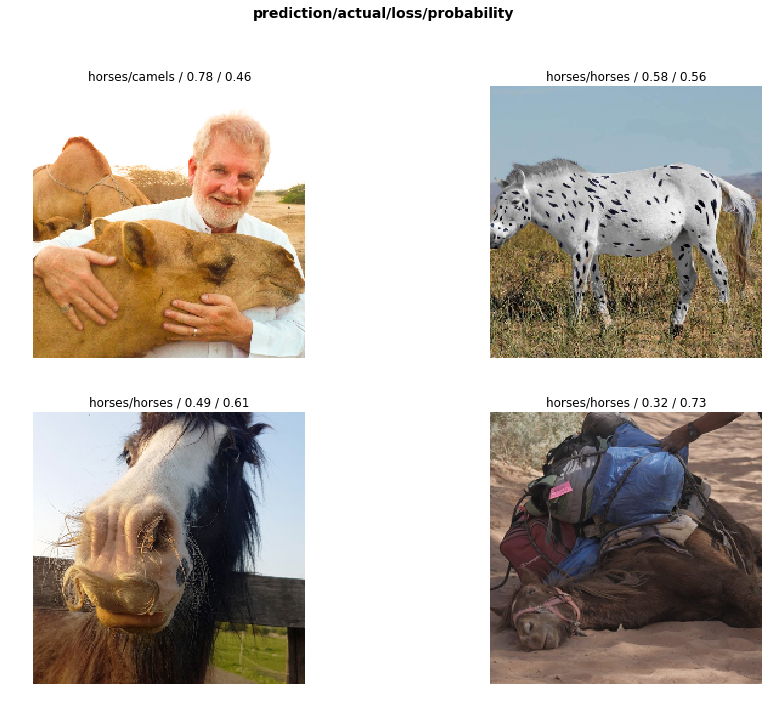

In [48]:
interp.plot_top_losses(4, figsize=(15,11))

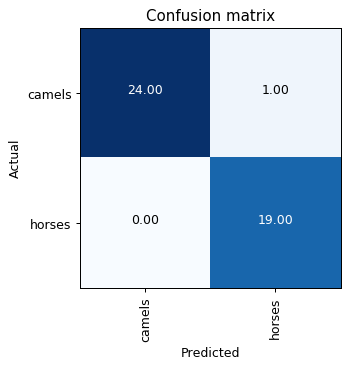

In [55]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=90)

---

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. Later in the course you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network might eat up our GPU memory.

In [39]:
np.random.seed(42)
bs=16

In [40]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, \
                                  num_workers=4, bs=bs)

### View data

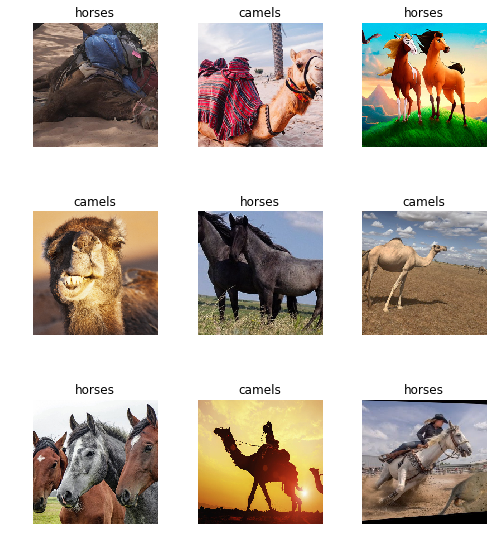

In [41]:
data.show_batch(rows=3, figsize=(7,8))

In [42]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['camels', 'horses'], 2, 137, 45)

### Learner

In [55]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [56]:
learn.fit_one_cycle(6)
#learn.fit_one_cycle(6, max_lr=0.03)

Total time: 00:31
epoch  train_loss  valid_loss  error_rate
1      0.466749    0.099453    0.022222    (00:05)
2      0.242525    0.125192    0.044444    (00:05)
3      0.162931    0.174656    0.022222    (00:05)
4      0.115277    0.127980    0.022222    (00:05)
5      0.104063    0.110816    0.022222    (00:05)
6      0.095058    0.117781    0.022222    (00:05)



## Unfreezing, fine-tuning, and learning rates

In [57]:
learn.unfreeze()

In [58]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


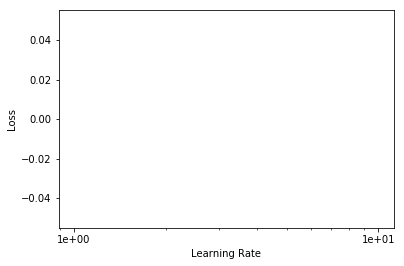

In [59]:
learn.recorder.plot()

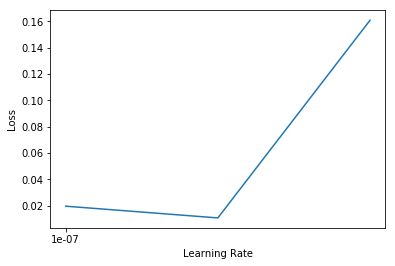

In [60]:
# if plot is blank
learn.recorder.plot(skip_start=0, skip_end=0)

In [61]:
learn.save('resnet50-stage1')

In [62]:
learn.fit_one_cycle(4, max_lr=slice(3e-7,3e-6))

Total time: 00:22
epoch  train_loss  valid_loss  error_rate
1      0.050954    0.109943    0.022222    (00:05)
2      0.061823    0.115937    0.022222    (00:05)
3      0.039227    0.108572    0.022222    (00:05)
4      0.029317    0.097003    0.022222    (00:05)



In [63]:
learn.load('resnet50-stage1')

In [64]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

Total time: 00:21
epoch  train_loss  valid_loss  error_rate
1      0.052193    0.105133    0.022222    (00:05)
2      0.053858    0.093264    0.022222    (00:05)
3      0.041574    0.088632    0.022222    (00:05)
4      0.042129    0.086076    0.022222    (00:05)



In [65]:
learn.save('resnet50-stage2')

In this case it doesn't, so let's go back to our previous model.

In [66]:
#learn.load('resnet50-stage-1')

FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter/tutorials/data/mammals/models/resnet50-stage-1.pth'

## Interpretation

In [67]:
interp = ClassificationInterpretation.from_learner(learn)

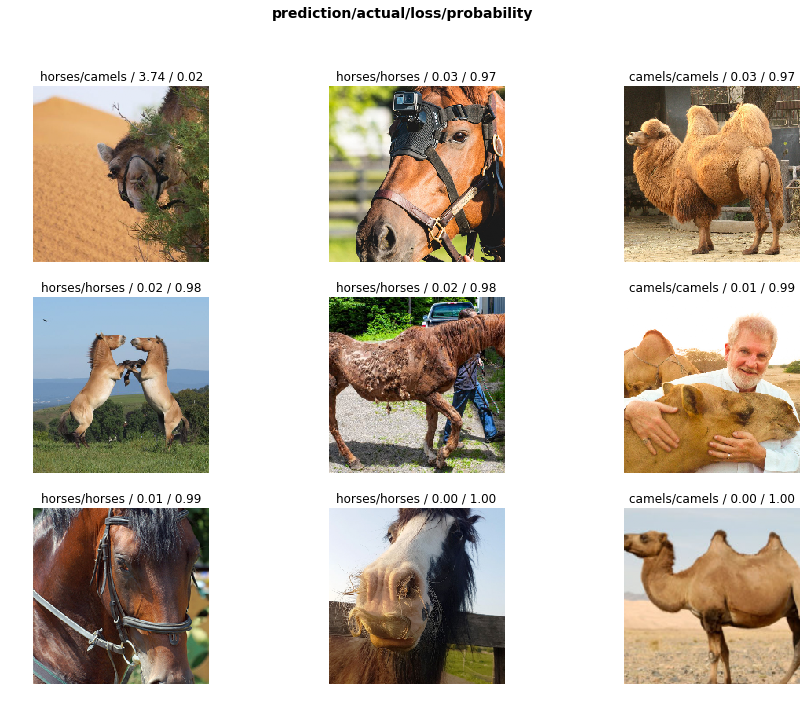

In [68]:
interp.plot_top_losses(9, figsize=(15,11))

In [69]:
interp.most_confused(min_val=0)

[('camels', 'horses', 1)]

## Save final model

In [70]:
final_model_name = 'resnet50-stage2'

## Predicting for New Images

In [71]:
learn.load(final_model_name)

In [54]:
??create_cnn

In [72]:
data2 = ImageDataBunch.single_from_classes("", 
                                           learn.data.classes,
                                          tfms=get_transforms(),
                                          size=224).normalize(imagenet_stats)
learn2 = create_cnn(data2, models.resnet50)
#learn2.load('resnet50-stage2')

In [73]:
data2.classes, data2.c

(['camels', 'horses'], 2)

In [74]:
# let's test my photo
url ="https://github.com/reshamas/reshamas.github.io/blob/master/assets/images/fl1_rs_camel.jpg?raw=true"

In [79]:
url = "https://media.gettyimages.com/photos/bo-derek-attends-sicab-2012-the-international-horse-fair-of-spain-on-picture-id156965178"

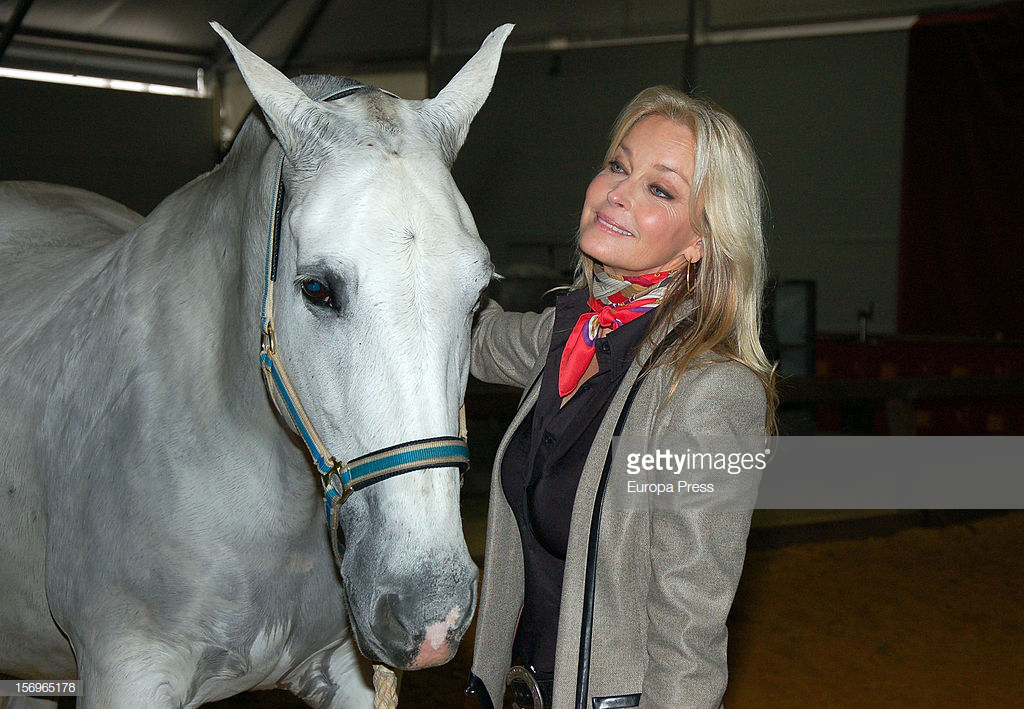

In [80]:
response = requests.get(url)
img = open_image(BytesIO(response.content))
img

In [81]:
pred_class, pred_idx, outputs = learn2.predict(img)

In [82]:
learn2.predict(img)

('horses', tensor(1), tensor([0.6822, 1.6416]))

In [83]:
print(pred_class, pred_idx, outputs, outputs[pred_idx])

horses tensor(1) tensor([0.6822, 1.6416]) tensor(1.6416)
